### IMPORT PACKAGES 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp
from scipy.stats import f


from datetime import timedelta


### EUROSTOXX ENVIRONMENT

Visualizing the performance of the EURO STOXX 50 index, this code reads data from a CSV file, calculates daily returns, normalizes these returns to show the growth of a 1 Euro investment, and plots the normalized returns over time alongside the closing prices of the index.

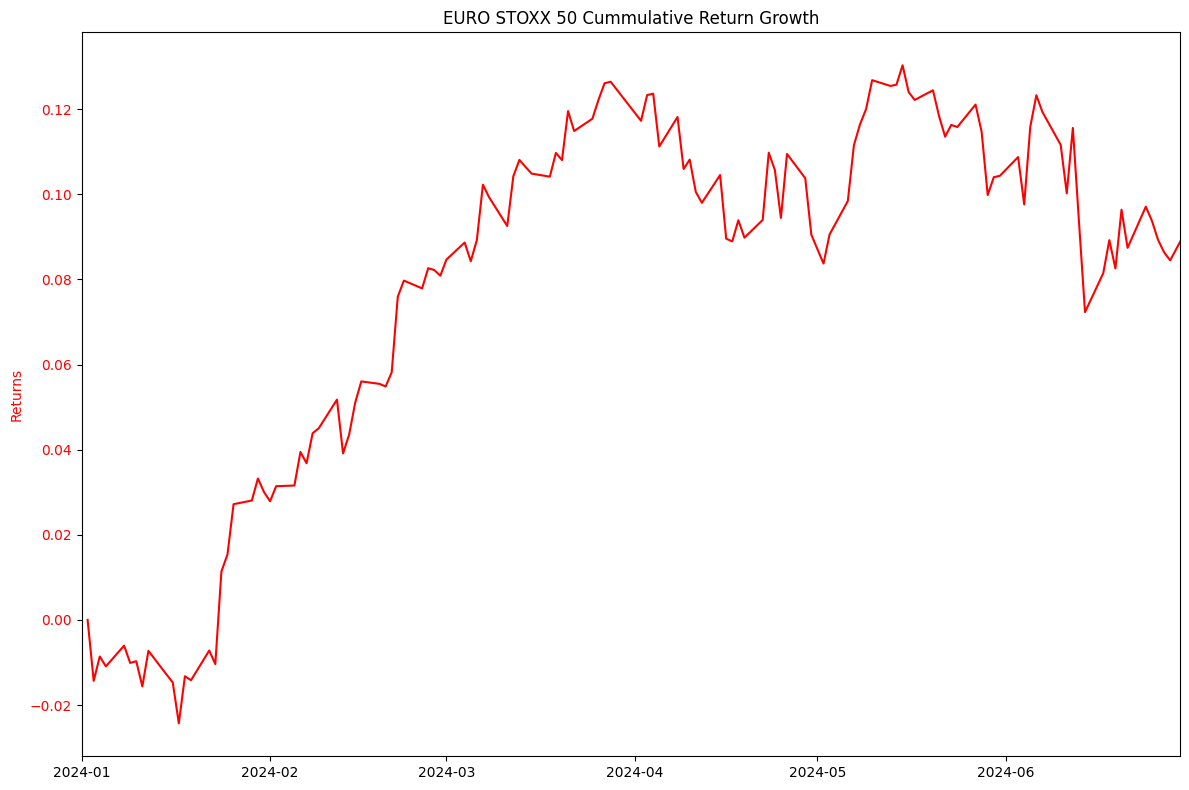

Sharpe Ratio for EURO STOXX 50: 0.860692861635135


,CLOSE,Returns,Normalized Returns,Excess Returns
Date,,,,
2024-01-02,4512.81,0.000000,0.000000,-0.000159
2024-01-03,4448.13,-0.014333,-0.014333,-0.014491
2024-01-04,4474.01,0.005818,-0.008598,0.005659
2024-01-05,4463.51,-0.002347,-0.010924,-0.002506
2024-01-08,4485.48,0.004922,-0.006056,0.004763
...,...,...,...,...
2024-06-25,4935.97,-0.003032,0.093769,-0.003190
2024-06-26,4915.94,-0.004058,0.089330,-0.004217
2024-06-27,4902.60,-0.002714,0.086374,-0.002872


In [2]:
data = pd.read_csv('EUROSTOXX_performance.csv', index_col=0)
ticker = '.STOXX50E'
data.index = pd.to_datetime(data.index)


if data.empty:
    print(f"Error fetching data for {ticker}")
else:
    data['Returns'] = data['CLOSE'].pct_change()

    data['Returns'].fillna(0, inplace=True)

    data['Normalized Returns'] = (1 + data['Returns']).cumprod() - 1

    fig, ax1 = plt.subplots(figsize=(12, 8))

    ax1.plot(data.index, data['Normalized Returns'], color='red', label='Returns')
    ax1.set_ylabel('Returns', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    ax1.set_xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-06-29 14:50:00'))

    plt.title('EURO STOXX 50 Cummulative Return Growth')
    fig.tight_layout()

    plt.show()
    risk_free_rate = 0.04  # Example risk-free rate

    risk_free_rate_daily = risk_free_rate / 252 

    data['Excess Returns'] = data['Returns'] - risk_free_rate_daily

    sharpe_ratio = data['Excess Returns'].mean() / data['Excess Returns'].std() * np.sqrt(126) 

    print(f'Sharpe Ratio for EURO STOXX 50: {sharpe_ratio}')
data

### SENTIMENT ENVIRONMENT

Analyzing the performance of different sentiment analysis algorithms, this code calculates the delta and normalized return based on the sentiment predictions from various algorithms (VADER, SVM, MLP, FinBERT).

In [3]:
df = pd.read_csv("df_part_3_final.csv", index_col=0)

algorithms_to_use = ['sentiment_vader', 'sentiment_svm', 'sentiment_mlp', 'sentiment_finbert_best']
df['versionCreated'] = pd.to_datetime(df['versionCreated'])
df.sort_values(inplace=True, by='versionCreated')
df.reset_index(inplace=True, drop=True)


for algorithm_to_use in algorithms_to_use:

      df['delta'] = df.apply(lambda row: row['versionCreatedClose'] - row['10-Minutes_real'] 
                        if row[algorithm_to_use] == 'negative' 
                        else (row['10-Minutes_real'] - row['versionCreatedClose']
                              if row[algorithm_to_use] == 'positive' 
                              else 0), axis=1)

      df[f'normalized_return_{algorithm_to_use}'] = df.apply(lambda row: 
                        row['10-Minutes_real'] / row['versionCreatedClose'] - 1
                        if row[algorithm_to_use] == 'positive' 
                        else (row['versionCreatedClose'] / row['10-Minutes_real'] -1
                              if row[algorithm_to_use] == 'negative' 
                              else 0),
                        axis=1)


      df[algorithm_to_use].value_counts()
df

,versionCreated,text,tickers,2-Minutes,5-Minutes,10-Minutes,versionCreatedClose,2-Minutes_real,5-Minutes_real,10-Minutes_real,...,comment_finbert_best,sentiment_svm,comment_sentiment_svm,sentiment_mlp,comment_mlp,delta,normalized_return_sentiment_vader,normalized_return_sentiment_svm,normalized_return_sentiment_mlp,normalized_return_sentiment_finbert_best
0,2024-01-02 07:36:42,Weekly: Banco Santander ADR (SAN US: $4.14) de...,SAN.MC,0.000000,0.000000,0.539084,3.710000,3.710000,3.710000,3.730000,...,"[0.99934179, 0.00052088354, 0.00013734987]",neutral,No Comment,neutral,No Comment,0.000000,0.0,0.000000,0.00000,0.000000
1,2024-01-02 07:36:46,Weekly: Iberdrola ADR (IBDRY: $52.50) rises fo...,IBE.MC,0.000000,0.000000,0.127660,11.284533,11.284533,11.284533,11.298939,...,"[8.573231e-05, 6.2135165e-05, 0.99985206]",positive,No Comment,neutral,No Comment,-0.014406,0.0,0.001277,0.00000,-0.001275
2,2024-01-02 07:57:23,BUZZ-India's Hindustan Unilever falls on $49 m...,ULVR.L,-0.314383,-0.130993,-0.130993,3817.000000,3805.000000,3812.000000,3812.000000,...,"[0.00025582506, 0.99950743, 0.00023678708]",positive,No Comment,positive,No Comment,-5.000000,0.0,-0.001310,-0.00131,-0.001310
3,2024-01-02 08:01:08,TotalEnergies E&P Norge AS - Brazil: Start of ...,TTEF.PA,-0.064558,0.322789,0.242092,61.960000,61.920000,62.160000,62.110000,...,"[0.0001185443, 0.99974757, 0.00013387493]",neutral,No Comment,neutral,No Comment,0.150000,0.0,0.000000,0.00000,0.002421
4,2024-01-02 08:01:48,BNP Paribas Issuance BV - Public Offer,BNPP.PA,0.127146,0.079466,0.206612,62.920000,63.000000,62.970000,63.050000,...,"[0.00017614331, 0.99959773, 0.00022616924]",neutral,No Comment,neutral,No Comment,0.130000,0.0,0.000000,0.00000,0.002066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106579,2024-06-28 14:42:16,"Novo Nordisk Class B (NOVO B: DKK1,009.80) off...",NOVOb.CO,-0.039628,-0.059441,-0.198138,1009.400000,1009.000000,1008.800000,1007.400000,...,"[5.4637971e-05, 0.00037851074, 0.99956685]",neutral,No Comment,neutral,No Comment,2.000000,0.0,0.000000,0.00000,0.001985
106580,2024-06-28 14:45:44,"Lowey Dannenberg, P.C. is Investigating Banco ...",SAN.MC,0.116077,0.034823,0.058038,4.307500,4.312500,4.309000,4.310000,...,"[9.3188311e-05, 0.99977618, 0.00013062388]",neutral,No Comment,neutral,No Comment,0.002500,0.0,0.000000,0.00000,0.000580
106581,2024-06-28 14:47:13,REG - National Grid PLC - Appointment of Comp...,NG.L,0.002031,-0.135410,-0.203114,886.200000,886.218000,885.000000,884.400000,...,"[0.00014505578, 0.99977213, 8.2794577e-05]",neutral,No Comment,neutral,No Comment,-1.800000,0.0,0.000000,0.00000,-0.002031
106582,2024-06-28 14:47:13,NATIONAL GRID PLC - APPOINTMENT OF COMPANY SE...,NG.L,0.002031,-0.135410,-0.203114,886.200000,886.218000,885.000000,884.400000,...,"[0.00016089926, 0.99837202, 0.0014671023]",neutral,No Comment,neutral,No Comment,0.000000,0.0,0.000000,0.00000,0.000000


In [4]:
df.dtypes

versionCreated                              datetime64[ns]
text                                                object
tickers                                             object
2-Minutes                                          float64
5-Minutes                                          float64
10-Minutes                                         float64
versionCreatedClose                                float64
2-Minutes_real                                     float64
5-Minutes_real                                     float64
10-Minutes_real                                    float64
sentiment_vader                                     object
comment_vader                                      float64
sentiment_finbert_best                              object
comment_finbert_best                                object
sentiment_svm                                       object
comment_sentiment_svm                               object
sentiment_mlp                                       obje

In [5]:
pd.set_option('display.max_colwidth', None)

df.sort_values("10-Minutes")[['text', '10-Minutes', 'sentiment_finbert_best', 'sentiment_vader', 'sentiment_svm', 'sentiment_mlp']].head(30)

,text,10-Minutes,sentiment_finbert_best,sentiment_vader,sentiment_svm,sentiment_mlp
85324,Investors concerned as ABB Limited down in recent days,-2.089249,neutral,neutral,negative,neutral
59044,"Thursday April 18, 2024 Compagnie Financiere Richemont ADR Compendium - A Snapshot as of April 18",-2.086438,positive,neutral,neutral,neutral
2817,"Diageo buys back 143,624 shares",-2.082962,positive,neutral,neutral,neutral
31197,REG-Novo Nordisk A/S: Semaglutide 1.0 mg demonstrates 24% reduction in the risk of kidney disease-related events in people with type 2 diabetes and chronic kidney disease in the FLOW trial,-2.082385,neutral,neutral,neutral,neutral
37196,British American Tobacco ADR (BTI: $30.83) hits one-month high; +33c [1.1%],-2.081599,negative,neutral,neutral,neutral
37188,Diageo ADR (DEO: $150.10) increases 0.3% against the trend; +52c [0.3%],-2.076540,negative,neutral,neutral,neutral
31199,NOVO NORDISK - EXPECTS TO FILE FOR REGULATORY APPROVALS OF A LABEL EXPANSION FOR OZEMPIC(®) IN US AND EU IN 2024,-2.051048,neutral,neutral,positive,positive
31201,NOVO NORDISK - DETAILED RESULTS FROM FLOW WILL BE PRESENTED AT A SCIENTIFIC CONFERENCE IN 2024,-2.051048,neutral,neutral,neutral,neutral
31203,"NOVO NORDISK - TRIAL ACHIEVED ITS PRIMARY ENDPOINT BY DEMONSTRATING A STATISTICALLY SIGNIFICANT AND SUPERIOR REDUCTION IN KIDNEY DISEASE PROGRESSION, MAJOR ADVERSE CARDIOVASCULAR EVENTS (MACE) AND DEATH OF 24% FOR PEOPLE TREATED WITH SEMAGLUTIDE 1.0 MG COMPARED TO PLACEBO",-2.051048,neutral,neutral,positive,positive
31205,NOVO NORDISK - EXPECTS TO FILE FOR REGULATORY APPROVALS OF A LABEL EXPANSION FOR OZEMPIC® IN US AND EU IN 2024.,-2.051048,neutral,neutral,positive,positive


A single news prediction often fails to forecast stock movement correctly (with incorrect predictions being more common than correct ones). However, because the algorithm tends to identify news that significantly impacts stock movements, it still demonstrates predictive capabilities.

In [6]:
def evaluate_sentiment_prediction(row, sentiment_column):
    stock_movement = row['10-Minutes']
    sentiment = row[sentiment_column]
    
    if sentiment == 'neutral':
        return 'neutral'
    elif (sentiment == 'positive' and stock_movement > 0) or (sentiment == 'negative' and stock_movement < 0):
        return 'correct'
    else:
        return 'incorrect'

for sentiment_column in ['sentiment_finbert_best', 'sentiment_vader', 'sentiment_svm', 'sentiment_mlp']:
    df[sentiment_column + '_evaluation'] = df.apply(evaluate_sentiment_prediction, axis=1, sentiment_column=sentiment_column)

results = {}

for sentiment_column in ['sentiment_finbert_best', 'sentiment_vader', 'sentiment_svm', 'sentiment_mlp']:
    correct_count = (df[sentiment_column + '_evaluation'] == 'correct').sum()
    neutral_count = (df[sentiment_column + '_evaluation'] == 'neutral').sum()
    incorrect_count = (df[sentiment_column + '_evaluation'] == 'incorrect').sum()
    
    correct_avg_positive = df.loc[(df[sentiment_column + '_evaluation'] == 'correct') & (df[sentiment_column] == 'positive'), '10-Minutes'].mean()
    correct_avg_negative = df.loc[(df[sentiment_column + '_evaluation'] == 'correct') & (df[sentiment_column] == 'negative'), '10-Minutes'].mean()
    neutral_avg = df.loc[df[sentiment_column + '_evaluation'] == 'neutral', '10-Minutes'].mean()
    incorrect_avg_positive = df.loc[(df[sentiment_column + '_evaluation'] == 'incorrect') & (df[sentiment_column] == 'positive'), '10-Minutes'].mean()
    incorrect_avg_negative = df.loc[(df[sentiment_column + '_evaluation'] == 'incorrect') & (df[sentiment_column] == 'negative'), '10-Minutes'].mean()
    
    results[sentiment_column] = {
        'correct': {
            'positive_count': df[(df[sentiment_column + '_evaluation'] == 'correct') & (df[sentiment_column] == 'positive')].shape[0],
            'negative_count': df[(df[sentiment_column + '_evaluation'] == 'correct') & (df[sentiment_column] == 'negative')].shape[0],
            'average_10_minutes_positive': correct_avg_positive,
            'average_10_minutes_negative': correct_avg_negative
        },
        'neutral': {
            'count': neutral_count,
            'average_10_minutes': neutral_avg
        },
        'incorrect': {
            'positive_count': df[(df[sentiment_column + '_evaluation'] == 'incorrect') & (df[sentiment_column] == 'positive')].shape[0],
            'negative_count': df[(df[sentiment_column + '_evaluation'] == 'incorrect') & (df[sentiment_column] == 'negative')].shape[0],
            'average_10_minutes_positive': incorrect_avg_positive,
            'average_10_minutes_negative': incorrect_avg_negative
        }
    }

# Print results
results


{'sentiment_finbert_best': {'correct': {'positive_count': 14900,
   'negative_count': 12506,
   'average_10_minutes_positive': 0.13692734990521283,
   'average_10_minutes_negative': -0.13039111203851314},
  'neutral': {'count': 44348, 'average_10_minutes': 0.0006318501587687525},
  'incorrect': {'positive_count': 20141,
   'negative_count': 14689,
   'average_10_minutes_positive': -0.10157007265786634,
   'average_10_minutes_negative': 0.10272492155396994}},
 'sentiment_vader': {'correct': {'positive_count': 2780,
   'negative_count': 454,
   'average_10_minutes_positive': 0.1452931155186541,
   'average_10_minutes_negative': -0.15370354815426102},
  'neutral': {'count': 99527, 'average_10_minutes': -0.0010754361182448086},
  'incorrect': {'positive_count': 3287,
   'negative_count': 536,
   'average_10_minutes_positive': -0.11512284202548688,
   'average_10_minutes_negative': 0.09716671376452032}},
 'sentiment_svm': {'correct': {'positive_count': 8209,
   'negative_count': 4463,
   'a

#### Calculate Performance Metrics

Comparing the performance of sentiment-based trading strategies with index fund returns, this code aggregates 10-minute sentiment returns to daily returns, combines them with daily index fund returns, and calculates different financial metrics/ statistical metrics for both.


In [7]:
sentiment_df = pd.DataFrame(df)
sentiment_df['versionCreated'] = pd.to_datetime(sentiment_df['versionCreated'])


index_df = pd.DataFrame(data)

sentiment_df.set_index('versionCreated', inplace=True)
daily_sentiment_returns = sentiment_df['normalized_return_sentiment_svm'].resample('D').apply(lambda x: np.prod(1 + x) - 1)

combined_df = pd.DataFrame({
    'Date': index_df.index,
    'Index_Returns': index_df['Returns'].values,
    'Sentiment_Returns': daily_sentiment_returns.reindex(index_df.index).values
}).dropna()

combined_df

combined_df['Cumulative_Index_Returns'] = (1 + combined_df['Index_Returns']).cumprod()
combined_df['Cumulative_Sentiment_Returns'] = (1 + combined_df['Sentiment_Returns']).cumprod()

total_days = len(combined_df)
annualized_index_return = (combined_df['Cumulative_Index_Returns'].iloc[-1] ** (252 / total_days)) - 1
annualized_sentiment_return = (combined_df['Cumulative_Sentiment_Returns'].iloc[-1] ** (252 / total_days)) - 1

print(f"Cumulative Index Return: {combined_df['Cumulative_Index_Returns'].iloc[-1]:.2f}")
print(f"Cumulative Sentiment Return: {combined_df['Cumulative_Sentiment_Returns'].iloc[-1]:.2f}")
print(f"Annualized Index Return: {annualized_index_return:.2%}")
print(f"Annualized Sentiment Return: {annualized_sentiment_return:.2%}")

Cumulative Index Return: 1.08
Cumulative Sentiment Return: 2.47
Annualized Index Return: 17.61%
Annualized Sentiment Return: 512.51%


In [10]:
sentiment_df = pd.DataFrame(df)
sentiment_df['versionCreated'] = pd.to_datetime(sentiment_df['versionCreated'])

index_df = pd.DataFrame(data)

# Aggregate 10-minute returns to hourly returns
sentiment_df.set_index('versionCreated', inplace=True)
hourly_sentiment_returns = sentiment_df['normalized_return_sentiment_finbert_best'].resample('H').apply(lambda x: np.prod(1 + x) - 1)

# Combine hourly returns with index fund returns
combined_df = pd.DataFrame({
    'Date': index_df.index,
    'Index_Returns': index_df['Returns'].values,
    'Sentiment_Returns': hourly_sentiment_returns.resample('D').apply(lambda x: np.prod(1 + x) - 1).reindex(index_df.index).values
}).dropna()

# Calculate cumulative returns
combined_df['Cumulative_Index_Returns'] = (1 + combined_df['Index_Returns']).cumprod()
combined_df['Cumulative_Sentiment_Returns'] = (1 + combined_df['Sentiment_Returns']).cumprod()
combined_df['Cumulative_Index_Returns_sum'] = (combined_df['Index_Returns']).cumsum()
combined_df['Cumulative_Sentiment_Returns_sum'] = (combined_df['Sentiment_Returns']).cumsum()

# Calculate annualized returns
total_days = len(combined_df)
annualized_index_return = (combined_df['Cumulative_Index_Returns'].iloc[-1] ** (252 / total_days)) - 1
annualized_sentiment_return = (combined_df['Cumulative_Sentiment_Returns'].iloc[-1] ** (252 / total_days)) - 1

# Print the results
print(f"Cumulative Index Return: {combined_df['Cumulative_Index_Returns'].iloc[-1]:.2f}")
print(f"Cumulative Sentiment Return: {combined_df['Cumulative_Sentiment_Returns'].iloc[-1]:.2f}")
print(f"Annualized Index Return: {annualized_index_return:.2%}")
print(f"Annualized Sentiment Return: {annualized_sentiment_return:.2%}")

annualized_index_return = (combined_df['Cumulative_Index_Returns_sum'].iloc[-1] / total_days) * 252
annualized_sentiment_return = (combined_df['Cumulative_Sentiment_Returns_sum'].iloc[-1] / total_days) * 252

# Print the results
print(f"Cumulative Index Return (Simple Addition): {combined_df['Cumulative_Index_Returns'].iloc[-1]:.2f}")
print(f"Cumulative Sentiment Return (Simple Addition): {combined_df['Cumulative_Sentiment_Returns'].iloc[-1]:.2f}")
print(f"Annualized Index Return (Simple Addition): {annualized_index_return:.2%}")
print(f"Annualized Sentiment Return (Simple Addition): {annualized_sentiment_return:.2%}")

Cumulative Index Return: 1.08
Cumulative Sentiment Return: 3.10
Annualized Index Return: 17.61%
Annualized Sentiment Return: 860.58%
Cumulative Index Return (Simple Addition): 1.08
Cumulative Sentiment Return (Simple Addition): 3.10
Annualized Index Return (Simple Addition): 16.90%
Annualized Sentiment Return (Simple Addition): 321.46%


In [12]:

mean_values = df[['2-Minutes', '5-Minutes', '10-Minutes']].mean()
std_values = df[['2-Minutes', '5-Minutes', '10-Minutes']].std()

t_test_results = {}
for column in ['2-Minutes', '5-Minutes', '10-Minutes']:
    t_stat, p_value = ttest_1samp(df[column], 0)
    t_test_results[column] = {'t-statistic': t_stat, 'p-value': p_value}

summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_values,
    't-statistic': [t_test_results[col]['t-statistic'] for col in ['2-Minutes', '5-Minutes', '10-Minutes']],
    'p-value': [t_test_results[col]['p-value'] for col in ['2-Minutes', '5-Minutes', '10-Minutes']]
})

summary_df['Significant (p > 0.01)'] = summary_df['p-value'] > 0.01

print(summary_df)

def f_test(var1, var2, n1, n2):
    f_stat = var1 / var2
    dfn = n1 - 1  
    dfd = n2 - 1 
    p_value = 1 - f.cdf(f_stat, dfn, dfd)
    return f_stat, p_value

variances = df[['2-Minutes', '5-Minutes', '10-Minutes']].var()
sample_sizes = df[['2-Minutes', '5-Minutes', '10-Minutes']].count()



                Mean  Standard Deviation  t-statistic   p-value  \
2-Minutes  -0.002177            0.170872    -4.159343  0.000032   
5-Minutes  -0.000964            0.210723    -1.493074  0.135421   
10-Minutes -0.000931            0.205147    -1.481588  0.138453   

            Significant (p > 0.01)  
2-Minutes                    False  
5-Minutes                     True  
10-Minutes                    True  


In [14]:
for algorithm_to_use in algorithms_to_use:
    df[f'cumulative_return_{algorithm_to_use}'] = (1+df[f'normalized_return_{algorithm_to_use}']).cumprod()
    df[f'cumulative_return_sum_{algorithm_to_use}'] = (df[f'normalized_return_{algorithm_to_use}']).cumsum()

df

,versionCreated,text,tickers,2-Minutes,5-Minutes,10-Minutes,versionCreatedClose,2-Minutes_real,5-Minutes_real,10-Minutes_real,...,sentiment_svm_evaluation,sentiment_mlp_evaluation,cumulative_return_sentiment_vader,cumulative_return_sum_sentiment_vader,cumulative_return_sentiment_svm,cumulative_return_sum_sentiment_svm,cumulative_return_sentiment_mlp,cumulative_return_sum_sentiment_mlp,cumulative_return_sentiment_finbert_best,cumulative_return_sum_sentiment_finbert_best
0,2024-01-02 07:36:42,Weekly: Banco Santander ADR (SAN US: $4.14) decreases 0.5% on weak volume; -2c [0.5%],SAN.MC,0.000000,0.000000,0.539084,3.710000,3.710000,3.710000,3.730000,...,neutral,neutral,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,2024-01-02 07:36:46,"Weekly: Iberdrola ADR (IBDRY: $52.50) rises for a seventh consecutive week, a seven-week rise of 15%; +37c [0.7%]",IBE.MC,0.000000,0.000000,0.127660,11.284533,11.284533,11.284533,11.298939,...,correct,neutral,1.000000,0.000000,1.001277,0.001277,1.000000,0.000000,0.998725,-0.001275
2,2024-01-02 07:57:23,BUZZ-India's Hindustan Unilever falls on $49 mln tax demand orders,ULVR.L,-0.314383,-0.130993,-0.130993,3817.000000,3805.000000,3812.000000,3812.000000,...,incorrect,incorrect,1.000000,0.000000,0.999965,-0.000033,0.998690,-0.001310,0.997417,-0.002585
3,2024-01-02 08:01:08,TotalEnergies E&P Norge AS - Brazil: Start of Production from the Second Development Phase of the Mero field,TTEF.PA,-0.064558,0.322789,0.242092,61.960000,61.920000,62.160000,62.110000,...,neutral,neutral,1.000000,0.000000,0.999965,-0.000033,0.998690,-0.001310,0.999831,-0.000164
4,2024-01-02 08:01:48,BNP Paribas Issuance BV - Public Offer,BNPP.PA,0.127146,0.079466,0.206612,62.920000,63.000000,62.970000,63.050000,...,neutral,neutral,1.000000,0.000000,0.999965,-0.000033,0.998690,-0.001310,1.001897,0.001902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106579,2024-06-28 14:42:16,"Novo Nordisk Class B (NOVO B: DKK1,009.80) offers Price Earnings growth of 1.03; +DKK7.20 [0.7%]",NOVOb.CO,-0.039628,-0.059441,-0.198138,1009.400000,1009.000000,1008.800000,1007.400000,...,neutral,neutral,1.520637,0.437327,2.523571,0.987370,0.899374,-0.089352,3.133410,1.268662
106580,2024-06-28 14:45:44,"Lowey Dannenberg, P.C. is Investigating Banco Santander, S.A. (“Banco Santander”) (NYSE:SAN) for Potential Violations of the Federal Securities Laws and Encourages Investors with more than $100,000 in Losses to Contact the Firm",SAN.MC,0.116077,0.034823,0.058038,4.307500,4.312500,4.309000,4.310000,...,neutral,neutral,1.520637,0.437327,2.523571,0.987370,0.899374,-0.089352,3.135229,1.269243
106581,2024-06-28 14:47:13,REG - National Grid PLC - Appointment of Company Secretary,NG.L,0.002031,-0.135410,-0.203114,886.200000,886.218000,885.000000,884.400000,...,neutral,neutral,1.520637,0.437327,2.523571,0.987370,0.899374,-0.089352,3.128860,1.267212
106582,2024-06-28 14:47:13,NATIONAL GRID PLC - APPOINTMENT OF COMPANY SECRETARY,NG.L,0.002031,-0.135410,-0.203114,886.200000,886.218000,885.000000,884.400000,...,neutral,neutral,1.520637,0.437327,2.523571,0.987370,0.899374,-0.089352,3.128860,1.267212


#### Compute Strategy Dataframe

Analyzing the performance of different sentiment analysis algorithms, this code extracts buy and sell signals based on the sentiment predictions from various algorithms (VADER, SVM, MLP, FinBERT). It calculates the delta and normalized return for each signal, tracks the money tied and earned, and computes cumulative returns for each algorithm. The results are stored in dictionaries for further analysis and visualization.

In [15]:

cumulative_returns_dict = {}
signals_dict = {}
for algorithm_to_use in algorithms_to_use:
    # Extract buy and sell signals based on the current algorithm
    buy_signals = df[df[algorithm_to_use] == 'positive']
    sell_signals = df[df[algorithm_to_use] == 'negative']

    signals = pd.concat([buy_signals, sell_signals])

    signals.sort_values(inplace=True, by='versionCreated')
    signals.reset_index(inplace=True, drop=True)


    revenue = 0.0  
    for index, row in signals.iterrows():
        filtered_data = signals[(signals['versionCreated'] < row['versionCreated'] + timedelta(seconds=1)) & 
                                (signals['versionCreated'] > row['versionCreated'] - timedelta(minutes=10)) & 
                                (signals.index <= index)]

        money_tied = filtered_data.apply(
            lambda row: row['versionCreatedClose'] if row[algorithm_to_use].strip().lower() != 'negative' else -row['versionCreatedClose'],
            axis=1
        ).sum()
        trades_tied = -((filtered_data[algorithm_to_use].str.strip().str.lower() == 'negative').sum() - \
             (filtered_data[algorithm_to_use].str.strip().str.lower() != 'negative').sum())
        print(trades_tied)
        signals.at[index, f'money_tied_{algorithm_to_use}'] = money_tied
        signals.at[index, f'money_tied_std_{algorithm_to_use}'] = trades_tied
        signals.at[index, f'trades_running_{algorithm_to_use}'] = len(filtered_data)
        revenue = signals.loc[:index, 'delta'].sum()
        signals.at[index, f'money_earned_{algorithm_to_use}'] = revenue

        first_price = signals.loc[0, 'versionCreatedClose'] if index > 0 else row['versionCreatedClose']
        revenue_std = signals.loc[:index, f'normalized_return_{algorithm_to_use}'].sum()
        signals.at[index, f'money_earned_std_{algorithm_to_use}'] = revenue_std

    signals[f'cum_normalized_return_{algorithm_to_use}'] = (1+signals[f'normalized_return_{algorithm_to_use}']).cumprod()
    signals_dict[algorithm_to_use] = signals.copy() 

    downsampled_df = signals[['versionCreated', 'versionCreatedClose', '10-Minutes_real', '10-Minutes', algorithm_to_use, f'normalized_return_{algorithm_to_use}', f'cumulative_return_{algorithm_to_use}',f'cumulative_return_sum_{algorithm_to_use}' , f'money_tied_std_{algorithm_to_use}']]

    columns_to_convert = ['versionCreatedClose', '10-Minutes_real', '10-Minutes', f'normalized_return_{algorithm_to_use}', f'cumulative_return_{algorithm_to_use}',f'cumulative_return_sum_{algorithm_to_use}' ,f'money_tied_std_{algorithm_to_use}']

    for col in columns_to_convert:
        downsampled_df[col] = pd.to_numeric(downsampled_df[col], errors='coerce')

    downsampled_df['versionCreated'] = pd.to_datetime(downsampled_df['versionCreated'])

    numeric_columns = ['versionCreatedClose', '10-Minutes_real', '10-Minutes', f'normalized_return_{algorithm_to_use}', f'cumulative_return_{algorithm_to_use}',f'cumulative_return_sum_{algorithm_to_use}', 'money_earned_std']
    existing_numeric_columns = [col for col in numeric_columns if col in downsampled_df.columns]

    sentiment_df = downsampled_df[['versionCreated', algorithm_to_use]]

    downsampled_df = downsampled_df.resample('1440min', on='versionCreated')[existing_numeric_columns].mean().reset_index()

    sentiment_df = sentiment_df.resample('1440min', on='versionCreated').first().reset_index()

    downsampled_df = pd.merge(downsampled_df, sentiment_df, on='versionCreated')

    downsampled_df[f'normalized_return_{algorithm_to_use}'] = downsampled_df['10-Minutes_real'] / downsampled_df['versionCreatedClose']
    downsampled_df[f'normalized_return_{algorithm_to_use}'] = downsampled_df[f'normalized_return_{algorithm_to_use}'].interpolate(method='linear')

    downsampled_df['money_tied'] = downsampled_df['versionCreatedClose']
    downsampled_df['money_tied'] = downsampled_df['money_tied'].interpolate(method='linear')
    downsampled_df.fillna(method='ffill', inplace=True)

    capital = 1.0
    short_multiplier = -1.0
    cumulative_returns = []

    for index, row in downsampled_df.iterrows():
        if row[algorithm_to_use] == 'positive':
            capital *= (1 + row[f'normalized_return_{algorithm_to_use}'])
        elif row[algorithm_to_use] == 'negative':
            capital *= (1 + short_multiplier * row[f'normalized_return_{algorithm_to_use}'])
        cumulative_returns.append(capital)

    cumulative_returns_dict[algorithm_to_use] = downsampled_df



1
2
3
4
5
6
1
2
1
-1
-2
-1
1
2
3
1
1
2
3
4
5
6
7
8
1
2
3
1
2
1
2
3
3
-1
0
1
3
0
-1
-2
-1
1
1
1
0
1
1
1
2
3
4
5
1
1
-1
1
1
1
1
1
1
2
1
1
2
-1
1
2
1
0
-1
1
2
3
1
1
1
2
1
2
3
4
3
4
2
3
4
5
1
1
1
2
1
2
1
1
2
3
4
3
-1
1
2
2
3
4
1
2
-1
-2
-1
1
0
1
1
2
1
2
1
1
2
3
4
5
6
7
8
9
10
7
6
7
8
6
1
2
1
1
-1
1
1
2
1
2
1
1
1
1
2
3
1
0
-1
-2
-1
1
2
3
3
3
2
1
-1
-2
-3
-4
-5
-4
-3
-4
-5
-6
-7
-8
-9
1
2
3
4
5
6
7
8
9
7
5
6
7
1
1
2
1
1
1
2
3
1
2
3
4
3
2
1
0
-1
-2
-1
-2
-3
-4
-5
-4
-5
-1
-2
-1
-1
0
-1
0
1
2
3
1
0
-1
-2
-1
-2
-3
-4
-5
-4
-5
-6
-7
-8
1
2
3
3
4
1
-1
0
1
2
1
0
-1
0
1
2
1
2
1
2
3
4
5
6
7
1
1
1
-1
0
1
2
3
4
1
2
-1
0
1
0
1
2
3
0
1
2
2
2
3
3
3
1
1
2
3
1
2
1
1
2
3
1
2
1
1
0
1
2
3
3
1
1
2
3
4
5
6
7
8
9
10
11
10
5
-1
1
1
0
-1
1
0
1
1
2
3
4
5
1
0
1
2
1
1
2
3
1
2
0
-2
-2
-1
1
2
3
4
5
1
1
-1
0
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
1
1
2
3
1
-1
0
-1
0
1
2
1
1
1
2
3
1
2
3
3
4
3
1
2
1
1
2
1
1
1
2
3
2
3
3
1
2
1
1
1
2
1
2
3
4
5
6
7
8
9
5
6
7
2
3
1
2
1
1
2
1
2
-1
1
1
1
2
3
1
2
3
4
1
1
1
1
1
2
3
1
2
3
1
2
3
1
2
3
4


C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df[col] = pd.to_numeric(downsampled_df[col], errors='coerce')
C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df['versionCreated'] = pd.to_datetime(downsampled_df['versionCreated'])
C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:72: FutureWarning: DataFrame.fillna with 'method' is dep

1
1
2
3
1
2
3
4
3
2
0
1
1
2
3
4
5
6
1
-1
0
1
0
1
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-15
-1
-2
-1
-1
0
1
2
2
-1
0
1
2
3
4
5
6
7
6
7
8
9
10
11
10
11
12
13
14
15
16
17
18
19
20
19
20
21
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
41
40
41
42
43
44
45
46
47
48
49
48
49
50
51
1
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-10
-9
-10
-11
-12
-13
-14
-15
-16
-17
-6
2
2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
12
13
14
15
14
15
16
17
18
19
20
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-1
-2
-3
-4
-5
-6
-7
-8
-7
2
1
2
1
2
3
4
3
2
1
0
-1
-2
-3
-4
1
2
1
2
3
2
1
0
1
2
3
2
3
4
5
6
2
3
4
5
6
7
8
9
9
10
9
8
7
6
5
4
3
2
1
0
-1
-2
-1
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
33
34
35
36
37
38
39
40
41
40
41
42
43
44
45
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
62
61
60
59
58
57
56
55
54
53
52
51
52
1
1
0
-1
0
1
2
3
2
3
4
1
-1
-2
-3
-2
2
1
2
3
4
5
6
7


C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df[col] = pd.to_numeric(downsampled_df[col], errors='coerce')
C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df['versionCreated'] = pd.to_datetime(downsampled_df['versionCreated'])
C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:72: FutureWarning: DataFrame.fillna with 'method' is dep

1
2
3
1
2
3
3
1
2
3
4
5
1
2
1
1
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
1
1
2
3
4
5
1
1
1
2
1
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
1
1
1
1
2
3
4
5
6
1
2
1
2
3
4
5
6
7
8
9
10
1
2
1
2
1
2
3
4
5
6
7
1
2
3
4
5
1
2
3
1
1
1
1
2
1
1
2
3
1
1
1
0
1
1
2
1
1
2
1
1
2
3
1
1
2
3
1
1
1
1
2
3
4
5
1
2
1
2
3
2
2
1
1
1
1
2
3
1
1
1
1
1
1
1
2
3
1
1
1
1
1
2
3
4
5
6
7
2
1
2
2
1
2
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
1
2
3
4
1
2
3
1
1
2
3
1
2
3
4
5
6
1
2
3
1
1
2
3
4
5
6
7
8
9
9
9
2
2
3
1
2
3
4
5
6
7
2
3
4
5
1
2
1
2
1
2
3
4
5
6
1
2
3
1
1
1
2
1
2
3
1
2
1
2
3
4
5
6
7
7
7
3
4
2
2
1
1
2
1
2
3
1
2
3
4
4
1
1
2
1
2
2
1
1
1
2
1
2
1
2
3
1
1
2
3
1
2
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
6

C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df[col] = pd.to_numeric(downsampled_df[col], errors='coerce')
C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df['versionCreated'] = pd.to_datetime(downsampled_df['versionCreated'])
C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:72: FutureWarning: DataFrame.fillna with 'method' is dep

-1
1
2
3
4
5
6
7
5
1
2
3
4
5
6
7
8
7
8
8
8
5
0
-1
0
0
1
2
4
5
6
7
6
7
8
7
3
4
3
4
5
6
7
8
9
10
9
9
0
0
1
0
-1
-2
-3
-4
-5
-6
-8
-9
-7
-6
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-44
-43
-42
-41
-40
-40
-42
-43
-44
-2
0
0
-1
0
1
2
4
5
6
7
6
7
7
6
7
8
9
5
4
3
2
2
0
3
3
4
4
4
3
2
1
0
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-41
-42
-43
-44
-45
-46
-47
-48
-49
-50
-51
-52
-53
-54
-55
-56
-57
-58
-59
-60
-61
-62
-61
-62
-63
-64
-65
-66
-67
-68
-69
-70
-71
-72
-73
-74
-76
-77
-78
-79
-80
-81
-82
-83
-84
-85
-86
-87
-87
-1
-2
-1
0
1
2
3
4
5
4
3
2
1
0
-1
-2
-3
-4
-5
-6
-7
-8
-9
-10
-11
-12
-13
-14
-15
-16
-17
-18
-19
-18
-17
-16
-17
-18
-19
-20
-21
-22
-23
-24
-25
-26
-27
-28
-29
-30
-31
-32
-33
-34
-35
-36
-37
-38
-39
-40
-42
0
-2
-3
-2
-3
-2
0
3
4


C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df[col] = pd.to_numeric(downsampled_df[col], errors='coerce')
C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_df['versionCreated'] = pd.to_datetime(downsampled_df['versionCreated'])
C:\Users\Boyu Wu\AppData\Local\Temp\ipykernel_19288\1992718287.py:72: FutureWarning: DataFrame.fillna with 'method' is dep

In [16]:
for algorithm_to_use in algorithms_to_use:
    print(len(signals_dict[algorithm_to_use]))
    display(signals_dict[algorithm_to_use][['versionCreated', 'versionCreatedClose' , '10-Minutes_real' , '10-Minutes',f'normalized_return_{algorithm_to_use}' ,f'cum_normalized_return_{algorithm_to_use}',f'money_tied_std_{algorithm_to_use}', f'money_tied_{algorithm_to_use}',algorithm_to_use]])

7057


,versionCreated,versionCreatedClose,10-Minutes_real,10-Minutes,normalized_return_sentiment_vader,cum_normalized_return_sentiment_vader,money_tied_std_sentiment_vader,money_tied_sentiment_vader,sentiment_vader
0,2024-01-02 08:34:11,616.584397,617.951763,0.221765,0.002218,1.002218,1.0,616.584397,positive
1,2024-01-02 08:34:12,616.584397,617.951763,0.221765,0.002218,1.004440,2.0,1233.168794,positive
2,2024-01-02 08:34:13,616.584397,617.951763,0.221765,0.002218,1.006668,3.0,1849.753191,positive
3,2024-01-02 08:40:18,617.658756,618.537777,0.142315,0.001423,1.008100,4.0,2467.411947,positive
4,2024-01-02 08:40:18,617.658756,618.537777,0.142315,0.001423,1.009535,5.0,3085.070703,positive
...,...,...,...,...,...,...,...,...,...
7052,2024-06-28 14:10:37,250.000000,250.000000,0.000000,0.000000,1.532243,1.0,250.000000,positive
7053,2024-06-28 14:13:47,11.856291,11.836862,-0.163867,-0.001639,1.529732,2.0,261.856291,positive
7054,2024-06-28 14:27:03,1011.000000,1008.200000,-0.276954,-0.002770,1.525496,1.0,1011.000000,positive
7055,2024-06-28 14:30:30,5219.000000,5216.000000,-0.057482,-0.000575,1.524619,2.0,6230.000000,positive


28276


,versionCreated,versionCreatedClose,10-Minutes_real,10-Minutes,normalized_return_sentiment_svm,cum_normalized_return_sentiment_svm,money_tied_std_sentiment_svm,money_tied_sentiment_svm,sentiment_svm
0,2024-01-02 07:36:46,11.284533,11.298939,0.127660,0.001277,1.001277,1.0,11.284533,positive
1,2024-01-02 07:57:23,3817.000000,3812.000000,-0.130993,-0.001310,0.999965,1.0,3817.000000,positive
2,2024-01-02 08:07:16,699.000000,696.000000,-0.429185,-0.004292,0.995673,2.0,4516.000000,positive
3,2024-01-02 08:07:21,11.529431,11.510224,-0.166597,-0.001666,0.994015,3.0,4527.529431,positive
4,2024-01-02 08:41:28,470.400000,470.350000,-0.010629,-0.000106,0.993909,1.0,470.400000,positive
...,...,...,...,...,...,...,...,...,...
28271,2024-06-28 14:32:33,37.860000,37.820000,-0.105652,-0.001057,2.530927,4.0,1390.010000,positive
28272,2024-06-28 14:32:34,34.560000,34.465000,-0.274884,0.002756,2.537904,3.0,1355.450000,negative
28273,2024-06-28 14:39:06,140.800000,140.950000,0.106534,-0.001064,2.535203,1.0,203.650000,negative
28274,2024-06-28 14:39:56,1531.500000,1527.500000,-0.261182,-0.002612,2.528581,2.0,1735.150000,positive


6520


,versionCreated,versionCreatedClose,10-Minutes_real,10-Minutes,normalized_return_sentiment_mlp,cum_normalized_return_sentiment_mlp,money_tied_std_sentiment_mlp,money_tied_sentiment_mlp,sentiment_mlp
0,2024-01-02 07:57:23,3817.000000,3812.000000,-0.130993,-0.001310,0.998690,1.0,3817.000000,positive
1,2024-01-02 08:07:16,699.000000,696.000000,-0.429185,-0.004292,0.994404,2.0,4516.000000,positive
2,2024-01-02 08:07:21,11.529431,11.510224,-0.166597,-0.001666,0.992747,3.0,4527.529431,positive
3,2024-01-02 08:42:14,470.383900,470.756000,0.079106,0.000791,0.993533,1.0,470.383900,positive
4,2024-01-02 08:48:05,30.270000,30.265000,-0.016518,-0.000165,0.993368,2.0,500.653900,positive
...,...,...,...,...,...,...,...,...,...
6515,2024-06-28 14:31:12,23.520000,23.490000,-0.127551,-0.001276,0.902293,1.0,23.520000,positive
6516,2024-06-28 14:32:19,409.950000,409.550000,-0.097573,0.000977,0.903174,0.0,-386.430000,negative
6517,2024-06-28 14:32:19,259.600000,259.400000,-0.077042,-0.000770,0.902478,1.0,-126.830000,positive
6518,2024-06-28 14:32:20,174.920000,174.560000,-0.205808,-0.002058,0.900621,2.0,48.090000,positive


62236


,versionCreated,versionCreatedClose,10-Minutes_real,10-Minutes,normalized_return_sentiment_finbert_best,cum_normalized_return_sentiment_finbert_best,money_tied_std_sentiment_finbert_best,money_tied_sentiment_finbert_best,sentiment_finbert_best
0,2024-01-02 07:36:46,11.284533,11.298939,0.127660,-0.001275,0.998725,-1.0,-11.284533,negative
1,2024-01-02 07:57:23,3817.000000,3812.000000,-0.130993,-0.001310,0.997417,1.0,3817.000000,positive
2,2024-01-02 08:01:08,61.960000,62.110000,0.242092,0.002421,0.999831,2.0,3878.960000,positive
3,2024-01-02 08:01:48,62.920000,63.050000,0.206612,0.002066,1.001897,3.0,3941.880000,positive
4,2024-01-02 08:06:22,977.018182,976.775720,-0.024817,-0.000248,1.001649,4.0,4918.898182,positive
...,...,...,...,...,...,...,...,...,...
62231,2024-06-28 14:42:13,1009.400000,1007.400000,-0.198138,0.001985,3.127201,-8.0,4178.638566,negative
62232,2024-06-28 14:42:16,1009.400000,1007.400000,-0.198138,0.001985,3.133410,-8.0,3181.090000,negative
62233,2024-06-28 14:45:44,4.307500,4.310000,0.058038,0.000580,3.135229,2.0,12061.377500,positive
62234,2024-06-28 14:47:13,886.200000,884.400000,-0.203114,-0.002031,3.128860,3.0,12947.577500,positive


#### Visualize Concurrent Trades

Visualizing the maximum number of concurrent trades per week for different sentiment analysis algorithms, this code creates a line plot with contrasting colors and line styles for each algorithm.

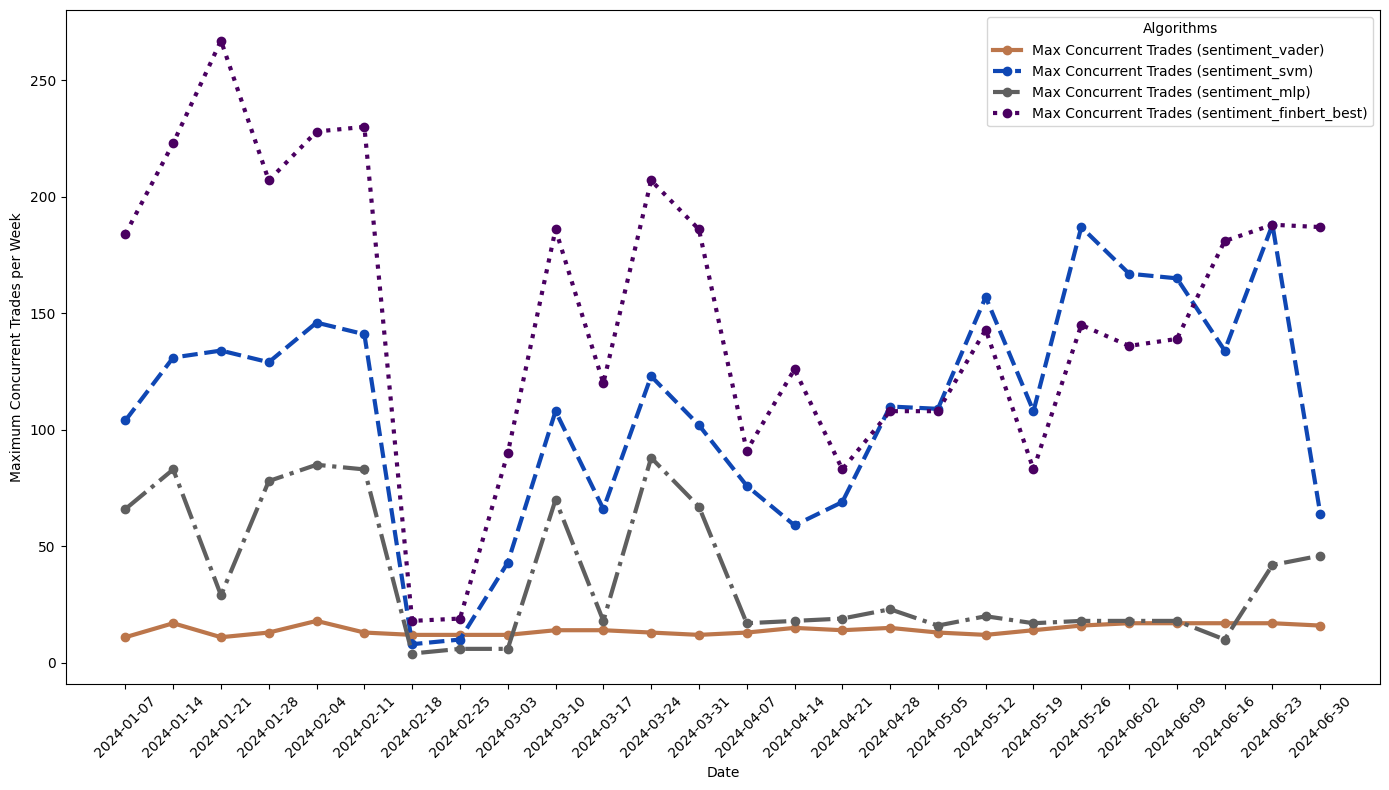

In [17]:
plt.figure(figsize=(14, 8))

colors = ['#bc764b', '#0f47b4', '#5f5f5f', '#4a0061']
# Light brown
# Darker blue
# Darker grey
# Darker purple


line_styles = ['-', '--', '-.', ':']

for i, algorithm_to_use in enumerate(algorithms_to_use):
    temp = signals_dict[algorithm_to_use][['versionCreated', f'trades_running_{algorithm_to_use}', algorithm_to_use]].copy()
    temp.set_index('versionCreated', inplace=True)
    
    weekly_max = temp.resample('W').max()
    
    plt.plot(
        weekly_max.index, 
        weekly_max[f'trades_running_{algorithm_to_use}'], 
        linestyle=line_styles[i % len(line_styles)], 
        color=colors[i % len(colors)], 
        marker='o', 
        linewidth=3,
        label=f'Max Concurrent Trades ({algorithm_to_use})'
    )

plt.xlabel('Date')
plt.ylabel('Maximum Concurrent Trades per Week')
plt.xticks(ticks=weekly_max.index, labels=weekly_max.index.strftime('%Y-%m-%d'), rotation=45)
plt.legend(title='Algorithms')
plt.tight_layout()
plt.show()

#### Visualize FInal Trading Strategy

Visualizing the cumulative returns of different sentiment analysis algorithms, this code calculates daily returns, normalizes them, and plots the cumulative returns for each algorithm alongside the EURO STOXX 50 index. It also fits an OLS regression line to the cumulative returns for each algorithm, providing a visual comparison of their performance over time.

versionCreated                           datetime64[ns]
versionCreatedClose                             float64
10-Minutes_real                                 float64
10-Minutes                                      float64
normalized_return_sentiment_vader               float64
cumulative_return_sentiment_vader               float64
cumulative_return_sum_sentiment_vader           float64
sentiment_vader                                  object
money_tied                                      float64
dtype: object
                                        OLS Regression Results                                        
Dep. Variable:     cumulative_return_sentiment_vader   R-squared (uncentered):                   0.757
Model:                                           OLS   Adj. R-squared (uncentered):              0.756
Method:                                Least Squares   F-statistic:                              554.4
Date:                               Fri, 16 Aug 2024   Prob (F-statist

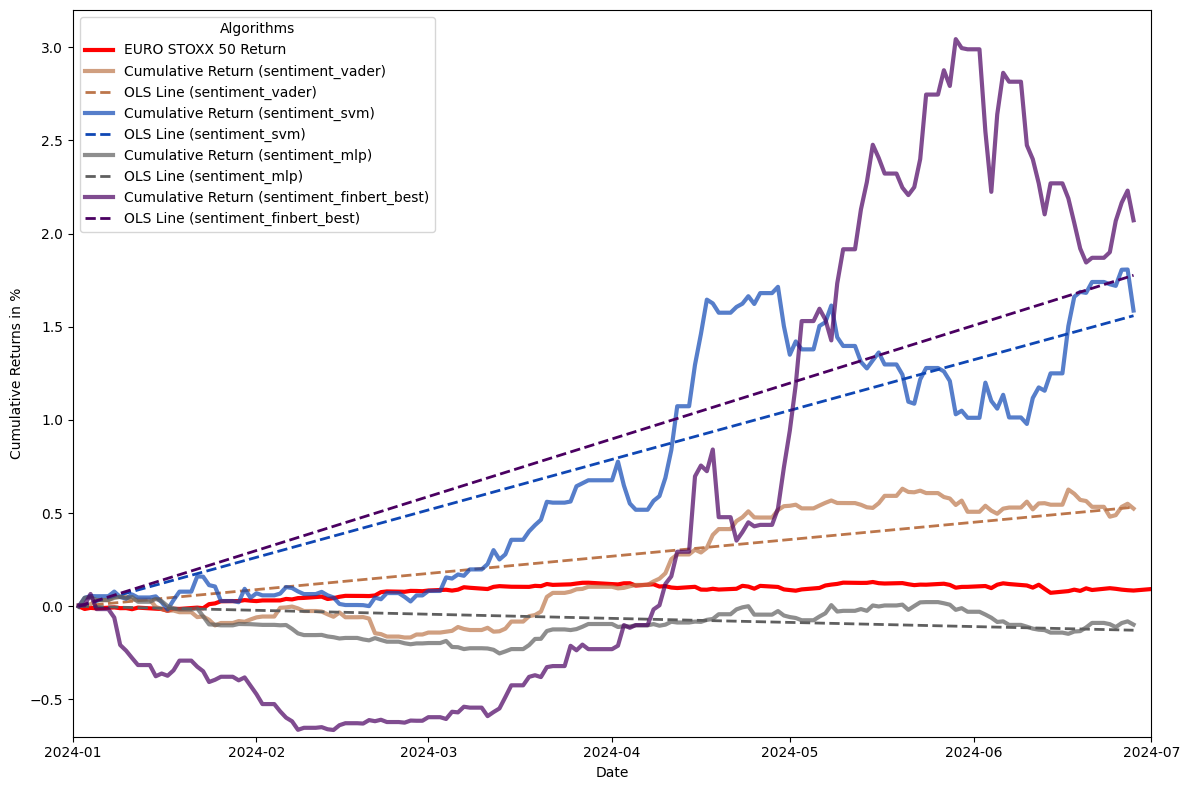

In [18]:

if data.empty:
    print("Error fetching data")
else:
    data['Returns'] = data['CLOSE'].pct_change()

    data['Returns'].fillna(0, inplace=True)

    data['Normalized Returns'] = (1 + data['Returns']).cumprod()

    algorithm_colors = {
        'sentiment_vader': '#bc764b',        # Light brown
        'sentiment_svm': '#0f47b4',          # Darker blue
        'sentiment_mlp': '#5f5f5f',          # Darker grey
        'sentiment_finbert_best': '#4a0061'  # Darker purple
    }

    line_styles = ['-', '--', '-.', ':']
    line_styles = ['-', '-', '-', '-']


    fig, ax1 = plt.subplots(figsize=(12, 8))

    ax1.plot(data.index, data['Normalized Returns'] - 1, color='red', label='EURO STOXX 50 Return', linewidth=3)

    for idx, algorithm_to_use in enumerate(algorithms_to_use):

        sampled_df = cumulative_returns_dict[algorithm_to_use]
        sampled_df['versionCreated'] = pd.to_datetime(sampled_df['versionCreated'])
        print(sampled_df.dtypes)

        X = np.arange(len(sampled_df['versionCreated']))
        y = sampled_df[f'cumulative_return_{algorithm_to_use}'] - 1  

        model = sm.OLS(y, X).fit()

        print(model.summary())

        adjusted_predictions = model.predict(X)

        color = algorithm_colors.get(algorithm_to_use, 'black')  
        line_style = line_styles[idx % len(line_styles)]

        ax1.plot(
            cumulative_returns_dict[algorithm_to_use]['versionCreated'],
            cumulative_returns_dict[algorithm_to_use][f'cumulative_return_{algorithm_to_use}'] - 1,
            linestyle=line_style,
            color=color,
            alpha=0.7,
            linewidth=3,
            label=f'Cumulative Return ({algorithm_to_use})'
        )

        ax1.plot(
            cumulative_returns_dict[algorithm_to_use]['versionCreated'],
            adjusted_predictions,
            linestyle='--',
            color=color,
            linewidth=2,
            label=f'OLS Line ({algorithm_to_use})'
        )

        target_date = pd.Timestamp('2024-06-30')

        ols_value = adjusted_predictions[-1]
        print(f">> OLS Regression value for {algorithm_to_use} on {target_date}: {ols_value:.2f}")


    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cumulative Returns in %')
    ax1.tick_params(axis='y')
    ax1.set_xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-07-01'))
    ax1.set_ylim(-0.7, 3.2)

    ax1.legend()

    plt.legend(title='Algorithms')
    plt.tight_layout()
    plt.show()